# Visualization

In [1]:
import warnings, platform
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [3]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    plt.rc('font', family='Malgun Gothic')
    fm._rebuild()
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

## Package load

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data load

In [5]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

In [6]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

df = pd.DataFrame({'country': [177.0, 7.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0]})
df.index = ['USA', 'Canada', 'Russia', 'UK', 'Belgium', 'Mexico', 'Germany', 'Denmark']
df = df.sort_values(by='country',ascending=False)
df["cumpercentage"] = df["country"].cumsum()/df["country"].sum()*100

airline_stats = pd.read_csv("./data/airline_stats.csv")
sp500_sym = pd.read_csv("./data/sp500_sectors.csv")
sp500_px = pd.read_csv("./data/sp500_data.csv.gz", index_col=0)
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
titanic = pd.read_csv('./data/titanic.csv')
kc_tax = pd.read_csv("./data/kc_tax.csv.gz")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]

fish_multi = pd.read_csv("./data/3-3-2-fish_multi_2.csv")
cov_data = pd.read_csv("./data/3-2-3-cov.csv")
diamond = pd.read_csv('./data/diamonds.csv', index_col='Unnamed: 0')
chicken = pd.read_csv('./data/ChickWeight.csv', index_col='Unnamed: 0')
mtcars = pd.read_csv('./data/mtcars.csv', index_col='Unnamed: 0')
economics = pd.read_csv('./data/economics.csv', index_col='Unnamed: 0')
usarrests = pd.read_csv('./data/USArrests.csv', index_col='Unnamed: 0')
housing = pd.read_csv('./data/housing.csv')
titanic_df = pd.read_csv('./data/titanic_train.csv')

line_sample_x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
line_sample_y = np.array([2, 3, 4, 3, 5, 4, 6, 7, 4, 8])
fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

time = pd.DataFrame({"time": [7000, 6800, 6600, 6400, 6200, 6000, 5800, 5600, 5400, 5200, 5000, 4800, 4600, 4400, 4200, 4000, 3800, 3600, 3400],
                     "pop": [200, 400, 450, 500, 300, 100, 400, 700, 830, 1200, 400, 350, 200, 700, 370, 800, 200, 100, 120], 
                     "grp": [2, 5, 8, 3, 2, 2, 4, 7, 9, 4, 4, 2, 2, 7, 5, 12, 5, 4, 4],
                     "med": [1.2, 1.3, 1.2, 0.9, 2.1, 1.4, 2.9, 3.4, 2.1, 1.1, 1.2, 1.5, 1.2, 0.9, 0.5, 3.3, 2.2, 1.1, 1.2]})

score = pd.Series([1, 2, 3, 4, 10, 2, 30, 42, 31, 50, 80, 76, 90, 87, 21, 43, 65, 76, 32, 12, 34, 54])

## Visualization

In [7]:
### 그래프 크기 조정
# plt.figure(figsize=(10, 6))

### (1) BarChart, Histogram

#### Barplot

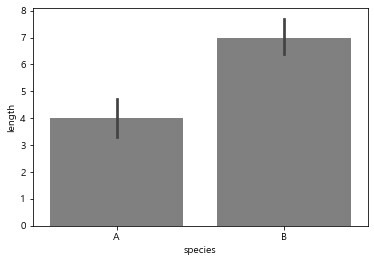

In [8]:
sns.barplot(x="species", y="length", data=fish_multi, color='gray')
plt.show()

In [9]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [10]:
wine_type = wine['Class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

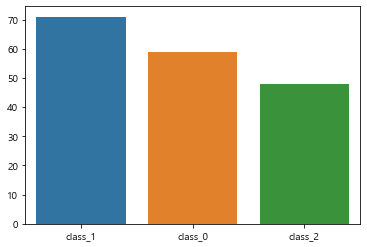

In [11]:
sns.barplot(x=wine_type.index, y=wine_type.values) # 데이터의 x, y
plt.show()

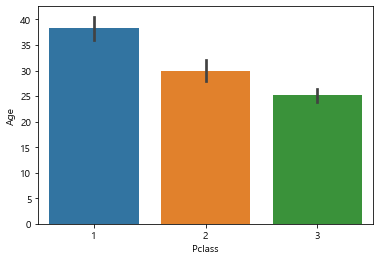

In [12]:
# 자동으로 xlabel, ylabel을 barplot()의 x인자값인 Pclass, y인자값이 Age로 설정. 
sns.barplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

[]

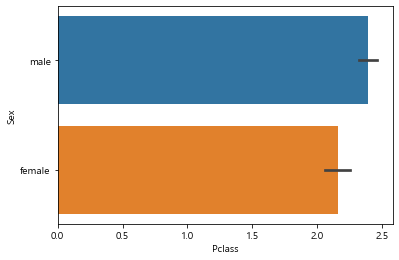

In [13]:
### y축을 문자값으로 설정하면 자동으로 수평 막대 그래프 변환
sns.barplot(x='Pclass', y='Sex', data=titanic_df)
plt.plot()

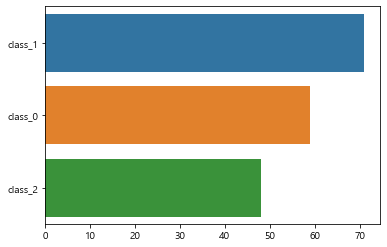

In [14]:
sns.barplot(x=wine_type.values, y=wine_type.index)
plt.show()

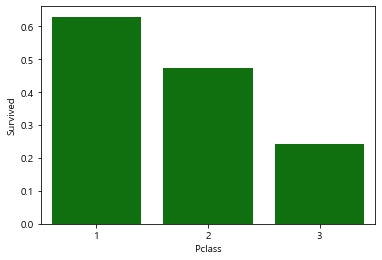

In [15]:
# confidence interval을 없애고, color를 통일.
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, color='green')
plt.show()

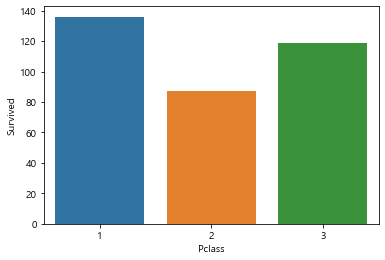

In [16]:
# estimator=sum을 적용하여 평균이 아니라 총합으로 표현.
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, estimator=sum)
plt.show()

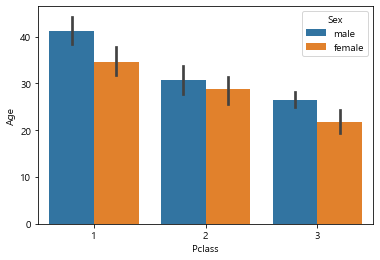

In [17]:
# hue 추가 설정
sns.barplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

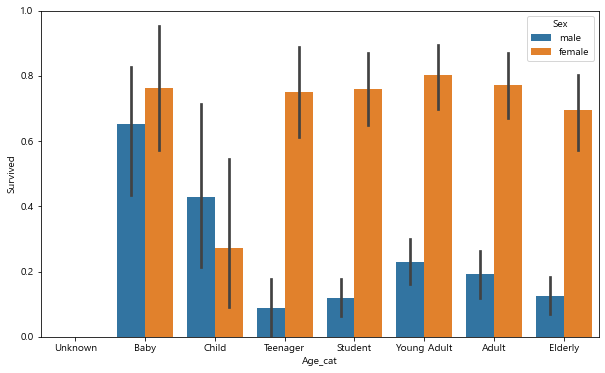

In [18]:
def get_category(age):
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly'] # x축의 값을 순차적으로 표시하기 위한 설정 
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

#### Countplot 

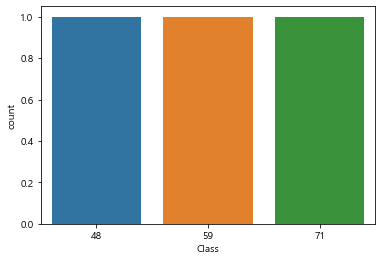

In [19]:
sns.countplot(x=wine_type.index, data=wine_type)
plt.show()

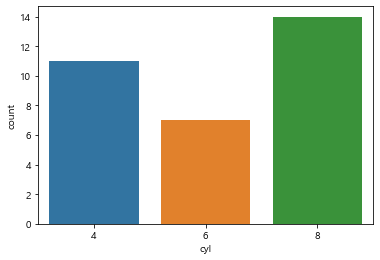

In [20]:
# 이게 더 쉬움
sns.countplot(x='cyl', data=mtcars)
plt.show()

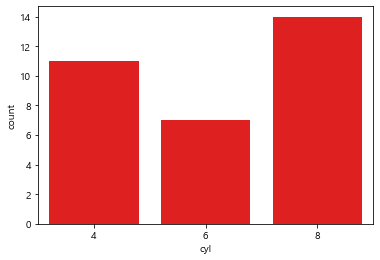

In [21]:
sns.countplot(x='cyl', data=mtcars, color='red')
plt.show()

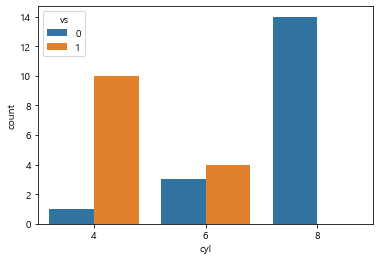

In [22]:
sns.countplot(x='cyl', data=mtcars, hue='vs')
plt.show()

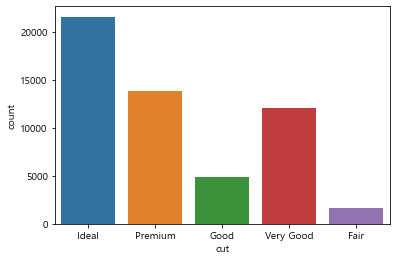

In [23]:
sns.countplot(x='cut', data=diamond)
plt.show()

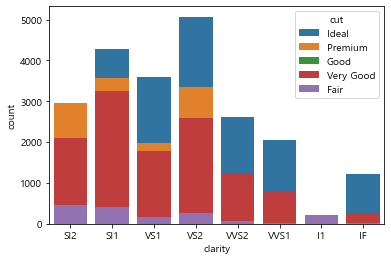

In [24]:
sns.countplot(x=diamond.clarity, data=diamond, hue=diamond.cut, dodge=False) # Countplot 내 변수별 색상 지정
plt.show()

#### Pointplot

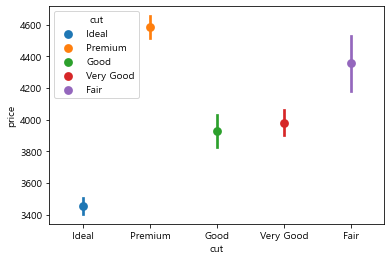

In [25]:
sns.pointplot(data=diamond, x="cut", y="price", hue='cut')
plt.show()

#### Pie
- 빈도의 비율을 직관적으로 시각화

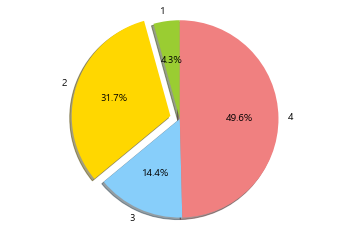

In [26]:
# 파이차트 속성 지정
labels = ['1', '2', '3' ,'4']
sizes = [43, 317, 144, 496]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)

# 파이차트 작성
# explode -> 특정 그룹에 대해 시각적인 분리 수준 결정 / autopct -> 각 범주가 데이터에서 차지하는 비율을 파이차트 위에 표현 / startangle -> 시작점 설정
# %1.1f%% -> 소수점 한 자리 방식의 % 표기한다는 의미
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

#### Pareto Diagram
- 상대도수의 크기가 큰 순서로 범주를 왼쪽부터 배열하여 막대그래프를 그림
- 누적상대도수를 구해서 각 막대의 중앙에 표시하고 연결

In [27]:
from matplotlib.ticker import PercentFormatter

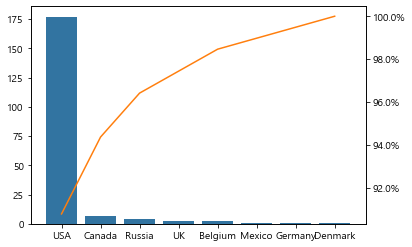

In [28]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(PercentFormatter())

sns.barplot(x=df['country'].index, y=df["country"].values, color="C0", ax=ax)
plt.plot(df["cumpercentage"].values, color="C1")


ax.tick_params(axis="y")
ax2.tick_params(axis="y")
plt.show()

#### Distplot
- Histplot과 사실상 동일 (높은 Seaborn 버전에서는 Histplot 사용 권장)

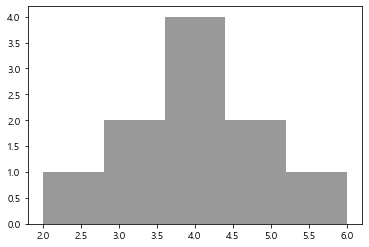

In [29]:
sns.distplot(fish_data, bins=5, color='black', kde=False)
plt.show()

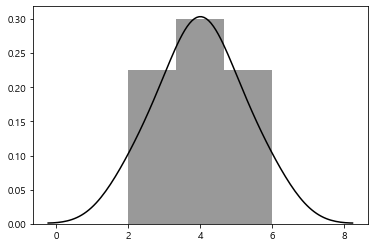

In [30]:
sns.distplot(fish_data, color='black')
plt.show()

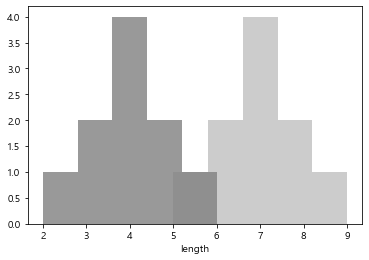

In [31]:
# 겹쳐서 그리기
length_a = fish_multi.query('species == "A"')["length"]
length_b = fish_multi.query('species == "B"')["length"]

sns.distplot(length_a, bins=5, color='black', kde=False)
sns.distplot(length_b, bins=5, color='gray', kde=False)
plt.show()

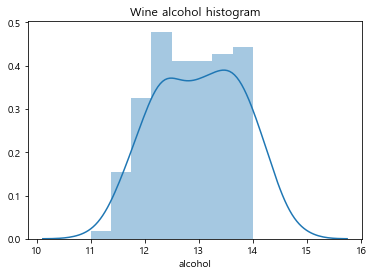

In [32]:
plt.title('Wine alcohol histogram')
sns.distplot(wine['alcohol'], bins=8, kde=True, hist_kws={"range": [11,14]}) # kde: 밀도함수 곡선 추가, hist_kws로 범위 지정
plt.show()

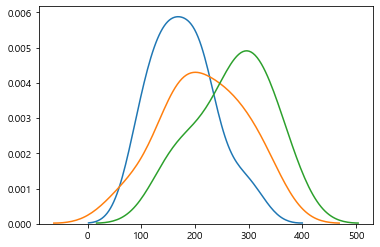

In [33]:
### 밀도 함수만 그리기: hist=False
data = chicken[chicken.Time==21]
target_1 = data.loc[data['Diet'] == 1]
target_2 = data.loc[data['Diet'] == 2]
target_3 = data.loc[data['Diet'] == 3]

sns.distplot(target_1[['weight']], hist=False)
sns.distplot(target_2[['weight']], hist=False)
sns.distplot(target_3[['weight']], hist=False)
plt.show()

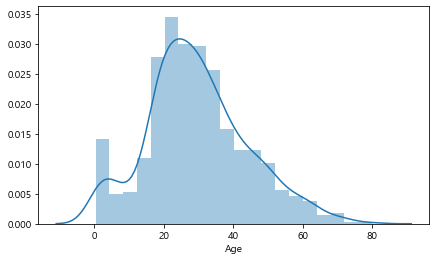

In [34]:
plt.figure(figsize=(7, 4))
# Pandas DataFrame의 컬럼명을 자동으로 인식해서 xlabel값을 할당. ylabel 값은 histogram일때 Count 할당. 
sns.distplot(titanic_df['Age'], bins=20)
plt.show()

#### Multi histogram & distplot

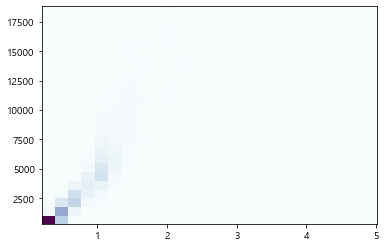

In [35]:
plt.hist2d(diamond['carat'], diamond['price'], bins=25, cmap='BuPu')
plt.show()

#### Ogive
- 누적도수의 분포 파악: 누적도수다각형의 기둥 중간점을 직선으로 연결
- NA가 없는 데이터를 입력해야 함

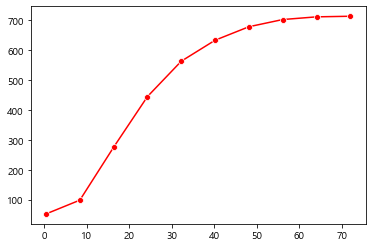

In [36]:
values, base = np.histogram(titanic_df['Age'].dropna(), bins=10)
sns.lineplot(x=base[:-1], y=np.cumsum(values), color='red', marker='o')
plt.show()

### (2) Box plot, Violin plot
- Whisker는 (Q1 - 1.5*IQR, Q3 + 1.5*IQR) 범위가 default, 이상치 판단 기준이 되기도 함

#### Box plot

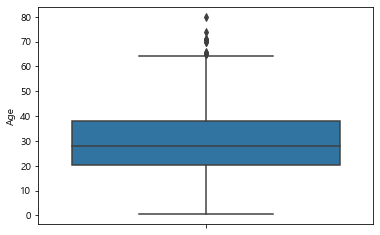

In [37]:
sns.boxplot(y='Age', data=titanic_df)
plt.show()

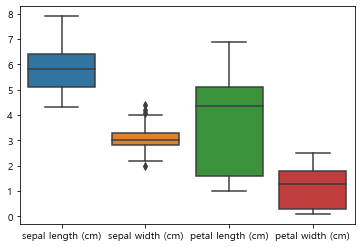

In [38]:
sns.boxplot(data=iris.drop('Class', axis=1)) # 범주형 변수 자동 감지 가능
plt.show()

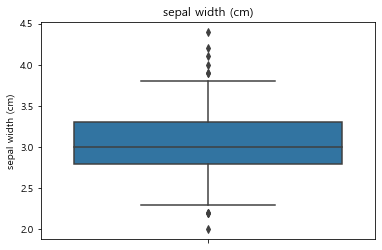

In [39]:
sns.boxplot(y=iris['sepal width (cm)'], whis=1) # 수염 길이 조정
plt.title('sepal width (cm)')
plt.show()

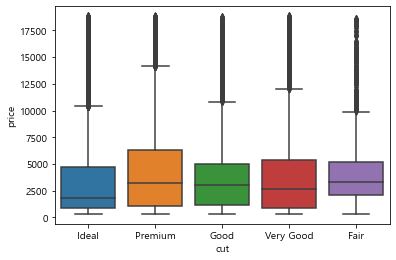

In [40]:
sns.boxplot(x='cut', y='price', data=diamond)
plt.show()

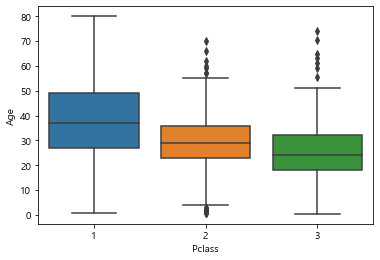

In [41]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

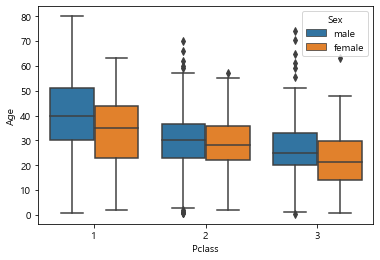

In [42]:
### hue 추가
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

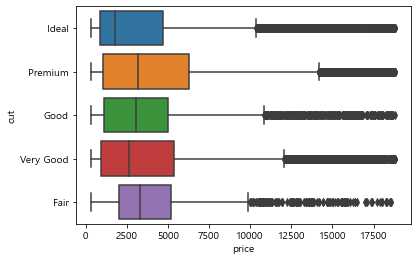

In [43]:
### 가로 Plot -> x, y를 반대로
sns.boxplot(x='price', y='cut', data=diamond)
plt.show()

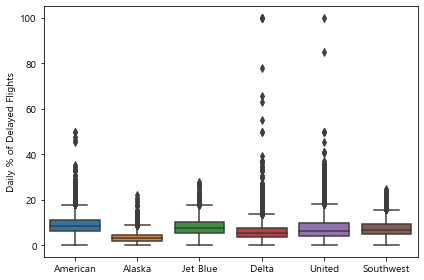

In [44]:
sns.boxplot(data=airline_stats, x='airline', y='pct_carrier_delay')
plt.xlabel('')
plt.ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

#### Violin plot

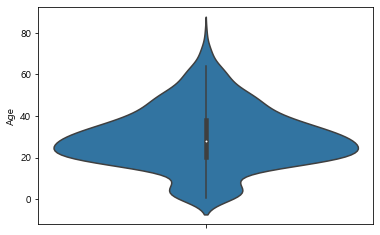

In [45]:
# Age 컬럼에 대한 수직 바이올린 플롯 시각화
sns.violinplot(y='Age', data=titanic_df)
plt.show()

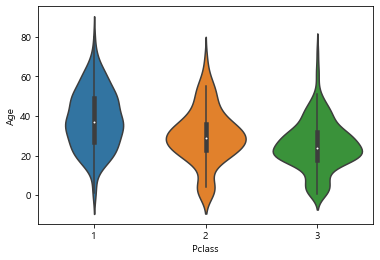

In [46]:
# x축값인 Pclass의 값별로 y축 값인 Age의 바이올린 플롯을 그림
# pClass값 별로 Age의 연속 확률분포 곡선과 박스플롯을 시각화하므로 pClass값별 Age 데이터 분포를 비교하여 볼수 있음.  
sns.violinplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

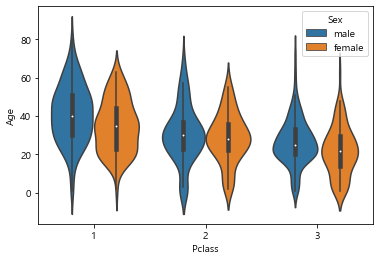

In [47]:
# x축값인 개별 Pclass내에서 Sex값 별로 y축 값인 Age의 바이올린 플롯을 그림 
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

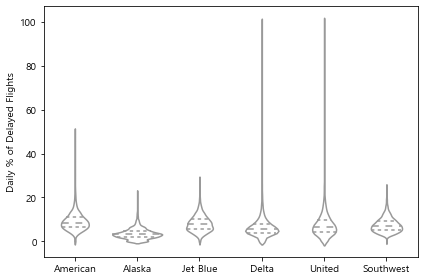

In [48]:
# quartile 추가
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', inner='quartile', color='white')
plt.xlabel('')
plt.ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### (3) Scatter
- 관계의 유형과 강도 파악
- 상관관계 분석 추가하면 좋음

#### Scatter plot

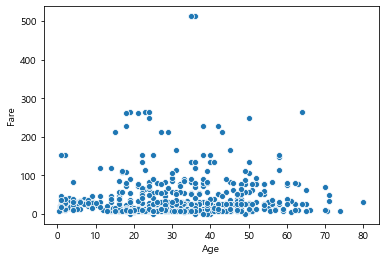

In [49]:
# X축값으로 Age를, Y축값으로 Fare를 설정
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.show()

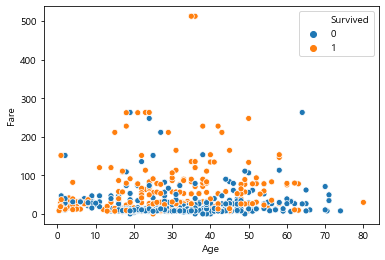

In [50]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.show()

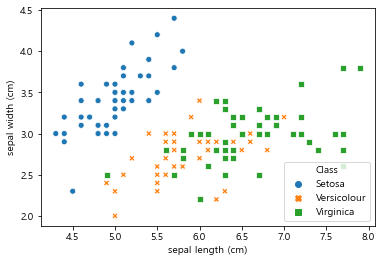

In [51]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='Class', style='Class') # hue and style
plt.show()

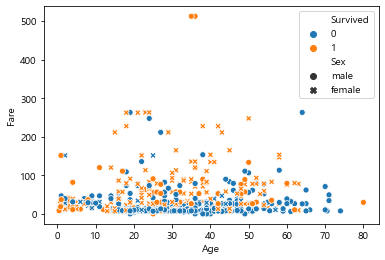

In [52]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_df)
plt.show()

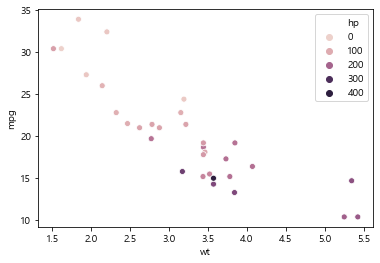

In [53]:
sns.scatterplot(x='wt', y='mpg', hue='hp', data=mtcars)
plt.show()

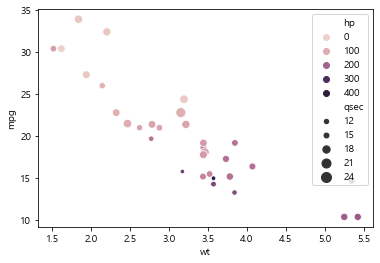

In [54]:
sns.scatterplot(x='wt', y='mpg', hue='hp', size='qsec', sizes=(20, 100), data=mtcars) # size 표현
plt.show()

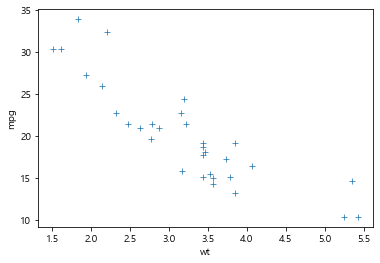

In [55]:
sns.scatterplot(x='wt', y='mpg', marker='+', data=mtcars)
plt.show()

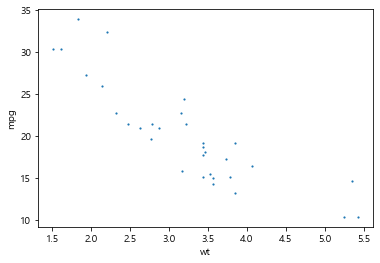

In [56]:
sns.scatterplot(x='wt', y='mpg', marker='.', data=mtcars)
plt.show()

In [57]:
import matplotlib.patches as mpatches

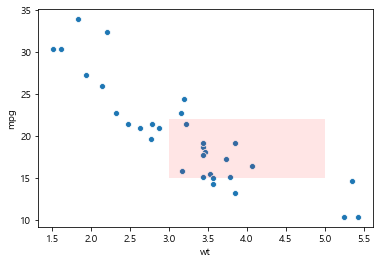

In [58]:
### add box in the plot
# 특정 역역 강조
sns.scatterplot(x='wt', y='mpg', data=mtcars)
left, bottom, width, height = (3, 15, 2, 7)
rect = mpatches.Rectangle((left, bottom), width, height, alpha=0.1, facecolor="red")
plt.gca().add_patch(rect)
plt.show()

In [59]:
from matplotlib import markers

# get all possible shapes
all_shapes = markers.MarkerStyle.markers.keys()
all_shapes

dict_keys(['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', ''])

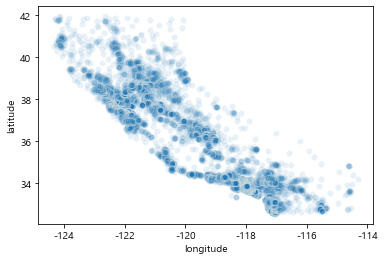

In [60]:
# Opacity 조정
sns.scatterplot(data=housing, x='longitude', y='latitude', alpha=0.1)
plt.show()

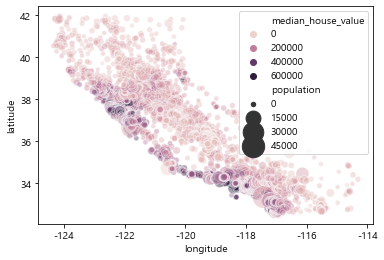

In [61]:
sns.set_palette("pastel")
sns.scatterplot(data=housing, x='longitude', y='latitude', alpha=0.4, size='population', sizes=(20, 500), hue='median_house_value')
plt.show()

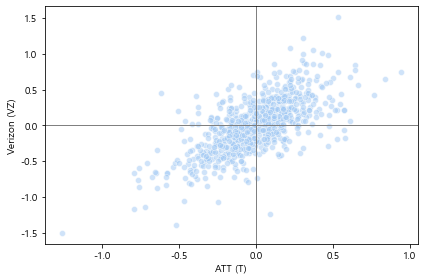

In [62]:
sns.scatterplot(x='T', y='VZ', data=telecom, alpha=0.5)
plt.xlabel('ATT (T)')
plt.ylabel('Verizon (VZ)')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

#### Joint plot
- Scatterplot의 파생형

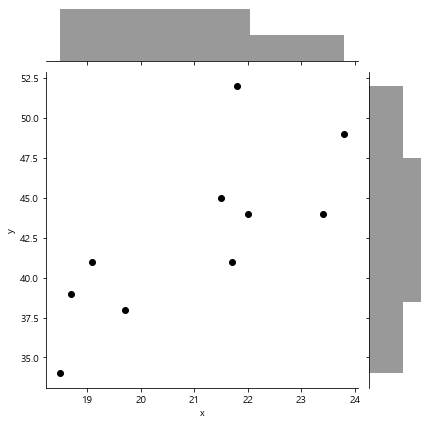

In [63]:
sns.jointplot(x="x", y="y", data=cov_data, color='black')
plt.show()

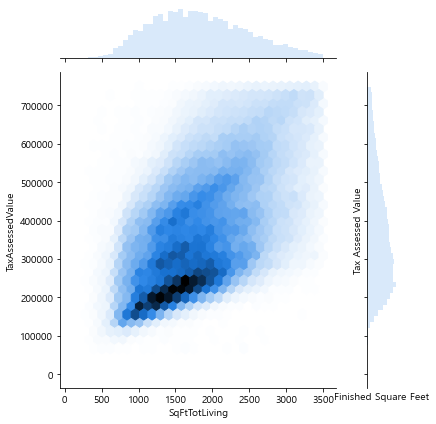

In [64]:
sns.jointplot(x='SqFtTotLiving', y='TaxAssessedValue', kind='hex', data=kc_tax0, gridsize=30)
plt.xlabel('Finished Square Feet')
plt.ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

#### Scatter matrix

In [65]:
from pandas.plotting import scatter_matrix

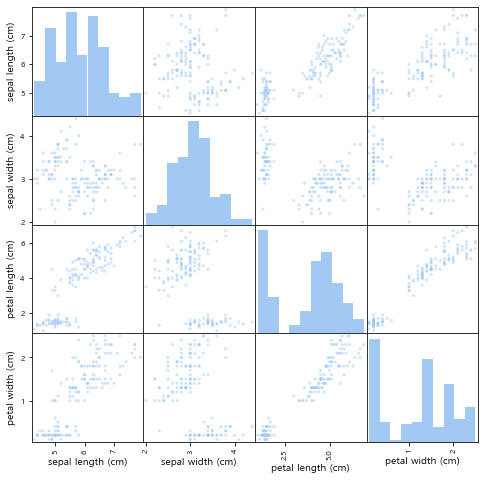

In [66]:
# outlier 확인, 관계 확인, Multi-colinearity확인
# alpht: opacity
# diagonal: 'hist'/'kde'
scatter_matrix(iris, alpha=0.5, figsize=(8, 8), diagonal='hist')
plt.show()

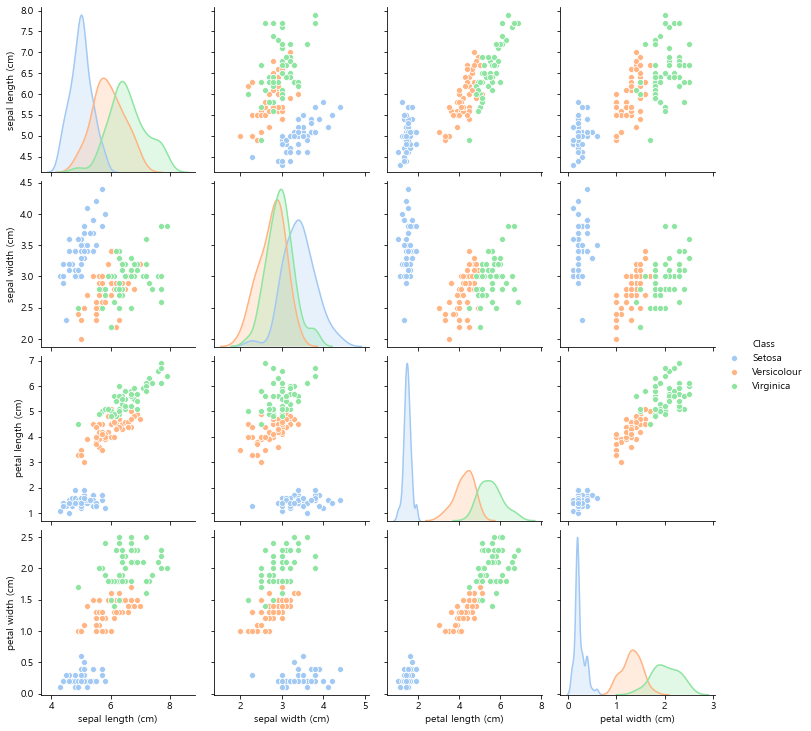

In [67]:
sns.pairplot(iris, diag_kind='auto', hue='Class') # diag_kind: auto, hist, kde
plt.show()

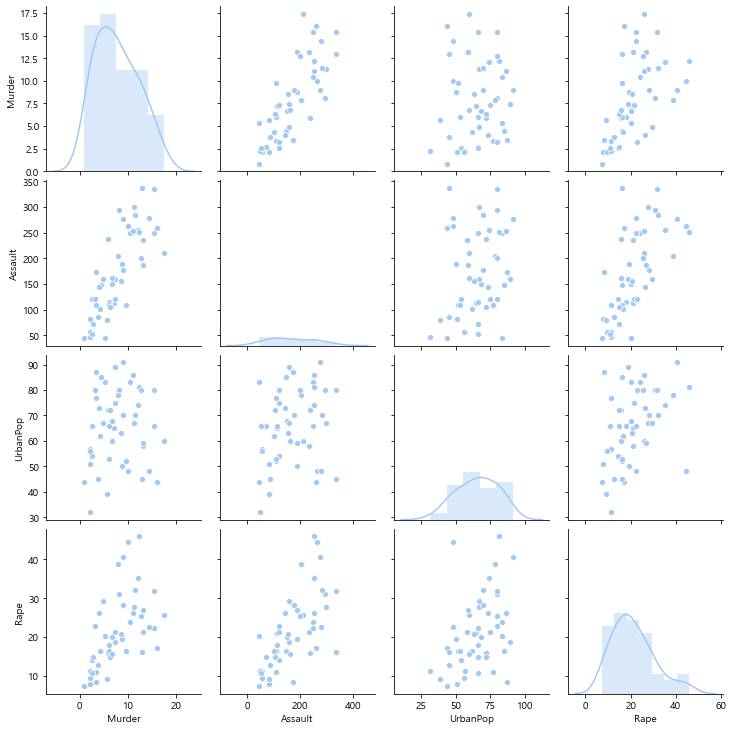

In [68]:
g = sns.PairGrid(usarrests)
g.map_diag(sns.distplot)
g.map_offdiag(sns.scatterplot)
plt.show()

#### Correlation heatmap

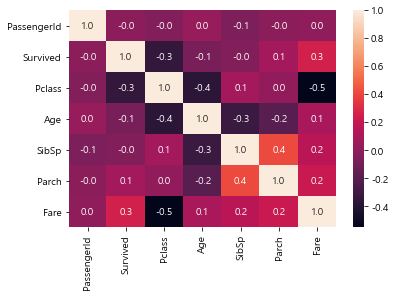

In [69]:
# 상관계수를 DataFrame으로 구하고 이를 heatmap()의 인자로 입력  
corr = titanic_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).corr()
sns.heatmap(corr, annot=True, fmt='.1f', cmap='rocket', cbar=True) # annot: 값 출력
plt.show()

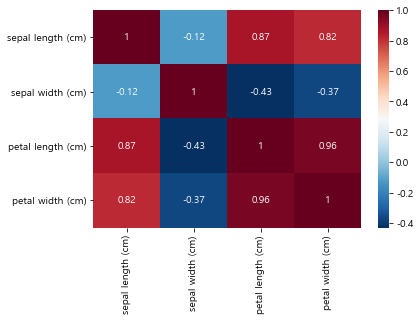

In [70]:
iris_corr=iris.drop(columns='Class').corr(method='pearson') # Pearson correlation

# Corr methods: pearson, kendall, spearman
# 절댓값 0.8 이상이면 강한 선형 상관관계로 판단, 0.4 미만이면 거의 상관 없음.
sns.heatmap(iris_corr, xticklabels=iris_corr.columns, yticklabels=iris_corr.columns, cmap='RdBu_r', annot=True) 
plt.show()

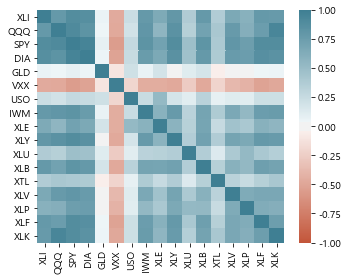

In [71]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), ax=ax)

plt.tight_layout()
plt.show()

In [72]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

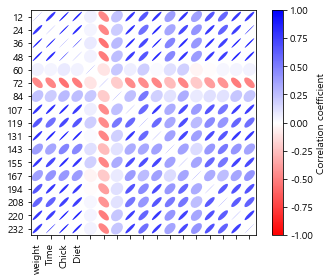

In [73]:
M = np.array(etfs.corr())
if not M.ndim == 2:
    raise ValueError('data must be a 2D array')
fig, ax = plt.subplots(1, 1, figsize=(5, 4), subplot_kw={'aspect': 'equal'})
ax.set_xlim(-0.5, M.shape[1] - 0.5)
ax.set_ylim(-0.5, M.shape[0] - 0.5)
ax.invert_yaxis()

# xy locations of each ellipse center
xy = np.indices(M.shape)[::-1].reshape(2, -1).T

# set the relative sizes of the major/minor axes according to the strength of
# the positive/negative correlation
w = np.ones_like(M).ravel() + 0.01
h = 1 - np.abs(M).ravel() - 0.01
a = 45 * np.sign(M).ravel()

ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy, norm=Normalize(vmin=-1, vmax=1), transOffset=ax.transData, array=M.ravel(), cmap='bwr_r')
ax.add_collection(ec)

# if data is a DataFrame, use the row/column names as tick labels
if isinstance(data, pd.DataFrame):
    ax.set_xticks(np.arange(M.shape[1]))
    ax.set_xticklabels(data.columns, rotation=90)
    ax.set_yticks(np.arange(M.shape[0]))
    ax.set_yticklabels(data.index)

cb = fig.colorbar(ec, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

### (4) Line plot

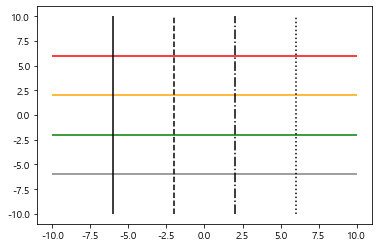

In [74]:
### 수평선, 수직선
# (value, min, max, color, linestyles)
plt.hlines(-6, -10, 10, color='grey')
plt.hlines(-2, -10, 10, color='green')
plt.hlines(2, -10, 10, color='orange')
plt.hlines(6, -10, 10, color='red')

plt.vlines(-6, -10, 10, linestyles='solid')
plt.vlines(-2, -10, 10, linestyles='dashed')
plt.vlines(2, -10, 10, linestyles='dashdot')
plt.vlines(6, -10, 10, linestyles='dotted')
plt.show()

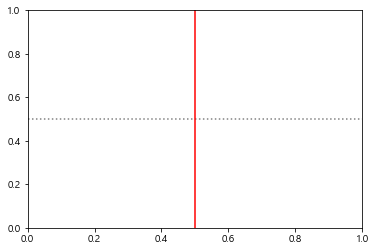

In [75]:
### 축과 수직, 수평이 되는 선
plt.figure(figsize=(6, 4))
plt.axhline(y=0.5, color='grey', linestyle='dotted') # linestyles가 아니고 linestyle
plt.axvline(x=0.5, color='red', linestyle='solid')
plt.show()

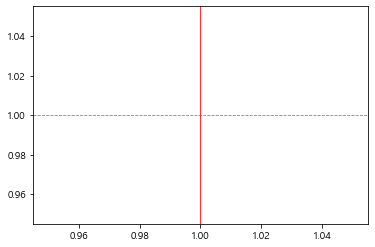

In [76]:
plt.figure(figsize=(6,4))
ax = plt.axes()            
ax.axhline(1, color='grey', linestyle='dashed', linewidth=0.8)
ax.axvline(1, color='red', linestyle='solid', linewidth=0.8)

plt.plot(ax=ax)
plt.show()

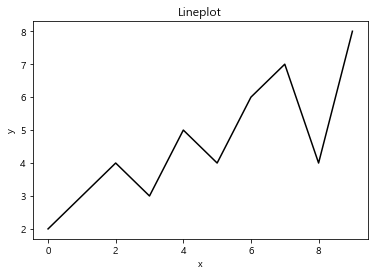

In [77]:
sns.lineplot(x=line_sample_x, y=line_sample_y, color='black')
plt.title("Lineplot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

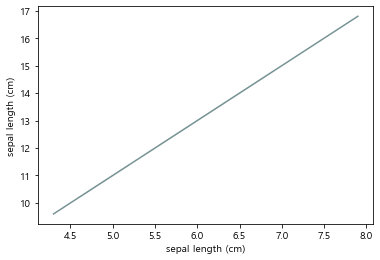

In [78]:
### function graph
def linear_func(x):
    return x*2 + 1 

x = iris['sepal length (cm)']
sns.lineplot(x=x, y=linear_func(x), color='#789395')
plt.show()

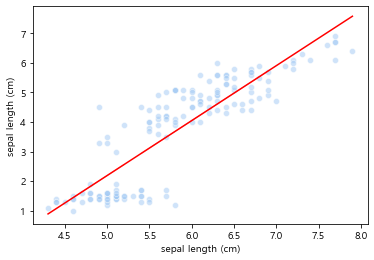

In [79]:
### Regression graph
# np.polyfit
x, y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(x, y, 1)

# Scatter and Line plot
sns.scatterplot(x=x, y=y, alpha = 0.5)
sns.lineplot(x=x, y=b1*x + b0, color='red')
plt.show()

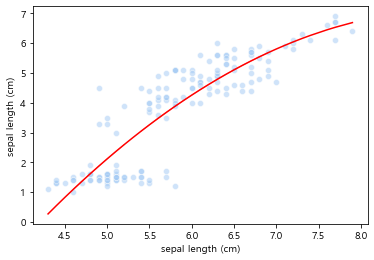

In [80]:
iris2 = iris.sort_values(by='sepal length (cm)')

x, y = iris2['sepal length (cm)'], iris2['petal length (cm)']
b2, b1, b0 = np.polyfit(x, y, 2)

sns.scatterplot(x=x, y=y, alpha=0.5)
sns.lineplot(x=x, y=b0 + b1*x + b2*x**2, color='red')
plt.show()

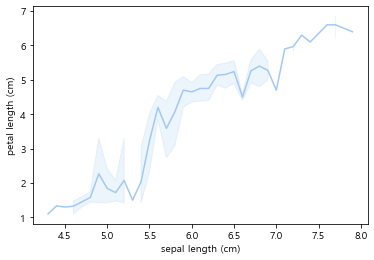

In [81]:
### 꺾은선 그래프
# 시간에 따른 변화를 보기 좋음 -> x축 정렬 필요
sns.lineplot(x=iris2['sepal length (cm)'], y=iris2['petal length (cm)'])
plt.show()

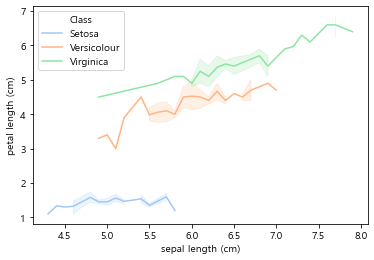

In [82]:
sns.lineplot(x=iris2['sepal length (cm)'], y=iris2['petal length (cm)'], hue=iris2['Class']) # hue로 카테고리를 지정할 수 있움
plt.show()

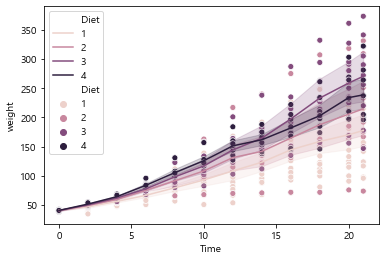

In [83]:
sns.scatterplot(x='Time', y='weight', data=chicken, hue='Diet')
sns.lineplot(x='Time', y='weight', data=chicken, hue='Diet')
plt.show()

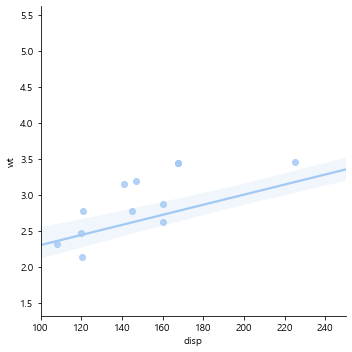

In [84]:
### 축 제한 방법
sns.lmplot(x='disp', y='wt', data=mtcars)
plt.xlim([100, 250]) 
plt.show()

In [85]:
from matplotlib import dates

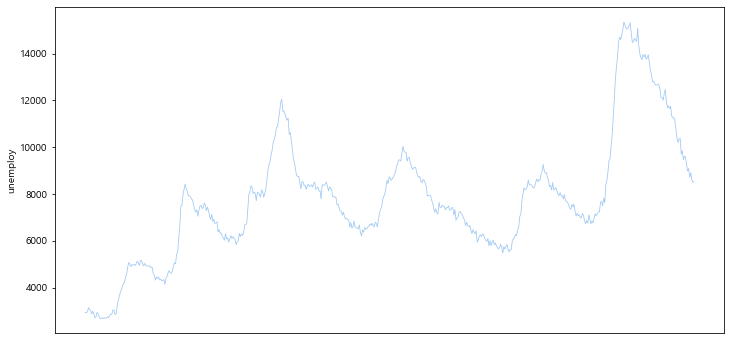

In [86]:
plt.figure(figsize=(12, 6))
ax = plt.axes()            
plt.xticks(rotation=15)
    
ax.xaxis.set_major_locator(dates.DayLocator(interval=50))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))

sns.lineplot(x='date', y='unemploy', data=economics, linewidth=0.8, linestyle='dashed', ax=ax)
plt.show()

In [87]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator

In [88]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(economics.drop('date', axis=1))

scaled_economics = pd.concat([economics['date'].reset_index(drop=True), pd.DataFrame(scaled, columns = economics.columns[1:])], axis=1)
melt_economics = scaled_economics.melt('date')

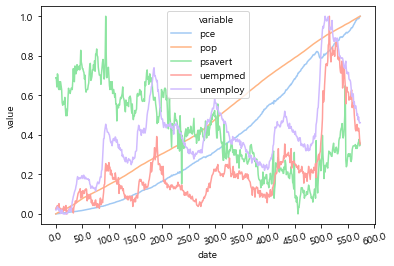

In [89]:
ax = plt.axes()            
plt.xticks(rotation=15)

### 축 숫자 개수 조정
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MultipleLocator(50))

### Multi linegraph
sns.lineplot(x='date', y='value', hue='variable', data=melt_economics, ax=ax)
plt.show()

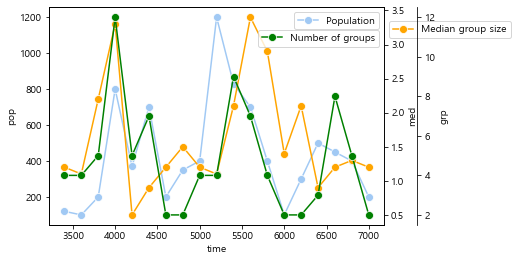

In [90]:
### Multiple axis
fig, ax = plt.subplots()
twin1 = ax.twinx()
twin2 = ax.twinx()
twin2.spines['right'].set_position(("axes", 1.1))

ax.set_xlabel('Time')
ax.set_ylabel('Population')
twin1.set_ylabel('Median group size')
twin2.set_ylabel('Number of groups')

ax = sns.lineplot(data=time, x='time', y='pop', marker='o', markersize=8, ax=ax, label='Population')
twin1 = sns.lineplot(data=time, x='time', y='med', marker='o', markersize=8, ax=twin1, color='orange', linestyle='dashed', label='Median group size')
twin2 = sns.lineplot(data=time, x='time', y='grp', marker='o', markersize=8, ax=twin2, color='green', linestyle='dotted', label='Number of groups')

twin1.legend(bbox_to_anchor=(1, 0.96))
twin2.legend(bbox_to_anchor=(1, 0.92))

plt.show()

### (5) Stem and leaf, Mosaic plot

#### Stem and leaf

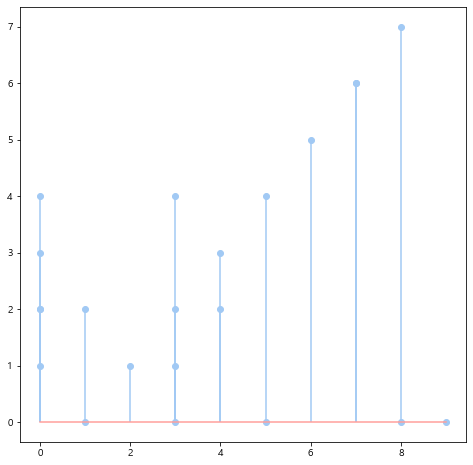

In [91]:
fig = plt.figure(figsize=(8, 8))

leafs = [x%10 for x in score] ## 잎
stems = [x//10 for x in score] ## 줄기

plt.stem(stems, leafs, use_line_collection=True) ## 줄기 잎 그림
plt.show()

In [92]:
# !pip install stemgraphic
import stemgraphic

(<Figure size 540x234 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0xffff60771cd0>)

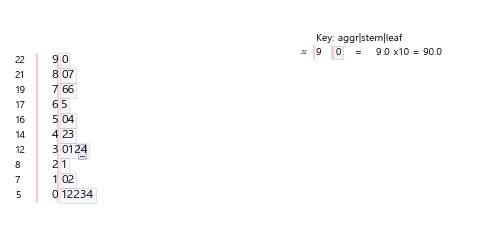

In [93]:
stemgraphic.stem_graphic(score, scale=10)

#### Mosaic

In [94]:
from statsmodels.graphics.mosaicplot import mosaic

In [95]:
titanic = titanic[['survived', 'pclass', 'sex']]

# make new variables of 'survived' and 'pclass' with the different class name
titanic["SURVIVE"] = titanic.survived.map({0: "DEAD", 1: "ALIVE"})
titanic["CLASS"] = titanic.pclass.map({1: "1ST", 2: "2ND", 3: "3RD"})
titanic["GENDER"] = titanic.sex.map({'male': 'MAN', 'female': "WOMAN"})

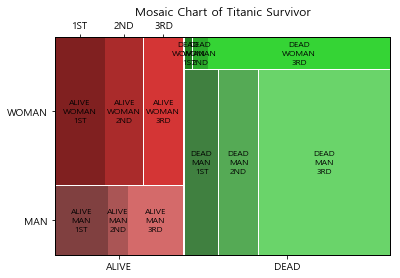

In [96]:
# Mosaic plot: 여러 개의 Categorical data 분포 파악에 도움. 두 변수의 구조적 특성 파악
mosaic(titanic.sort_values('CLASS'), ['SURVIVE', 'GENDER', 'CLASS'], title='Mosaic Chart of Titanic Survivor')
plt.show()

### (6) Subplots

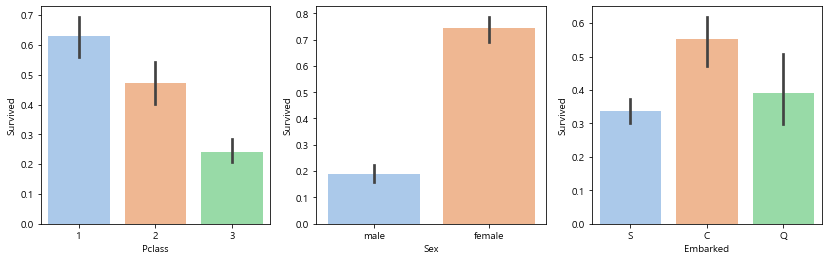

In [97]:
cat_columns = ['Pclass', 'Sex', 'Embarked']

# nrows는 1이고 ncols는 컬럼의 갯수만큼인 subplots을 설정. 
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14, 4))

for index, column in enumerate(cat_columns):
    sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index]) # seaborn의 Axes 레벨 function들은 ax인자로 subplots의 어느 Axes에 위치할지 설정. 

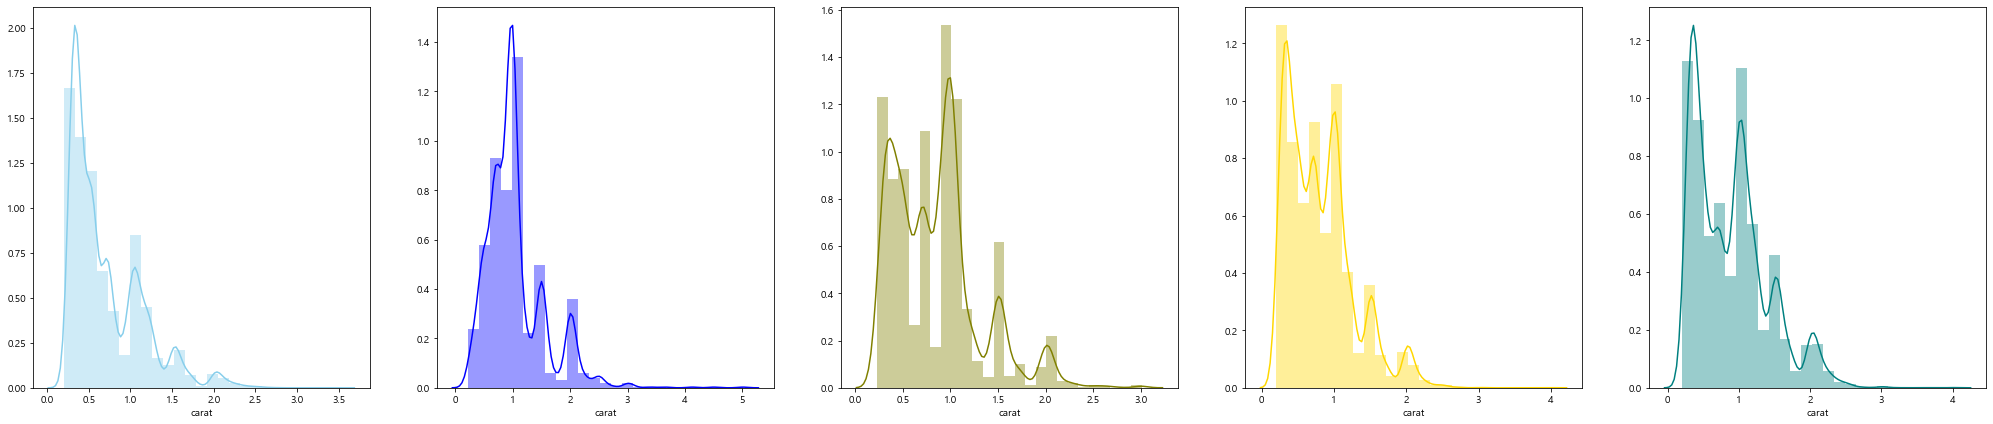

In [98]:
### subplot & histogram
cut_list = ['Ideal', 'Fair', 'Good', 'Very Good', 'Premium']
color_list = ['skyblue', 'blue', 'olive', 'gold', 'teal']

fig, axs = plt.subplots(nrows=1, ncols=len(cut_list), figsize=(35, 7))
for i, item in enumerate(cut_list):
    sns.distplot(diamond[diamond.cut==item].carat, kde=True, color=color_list[i], ax=axs[i], bins=25)
plt.show()

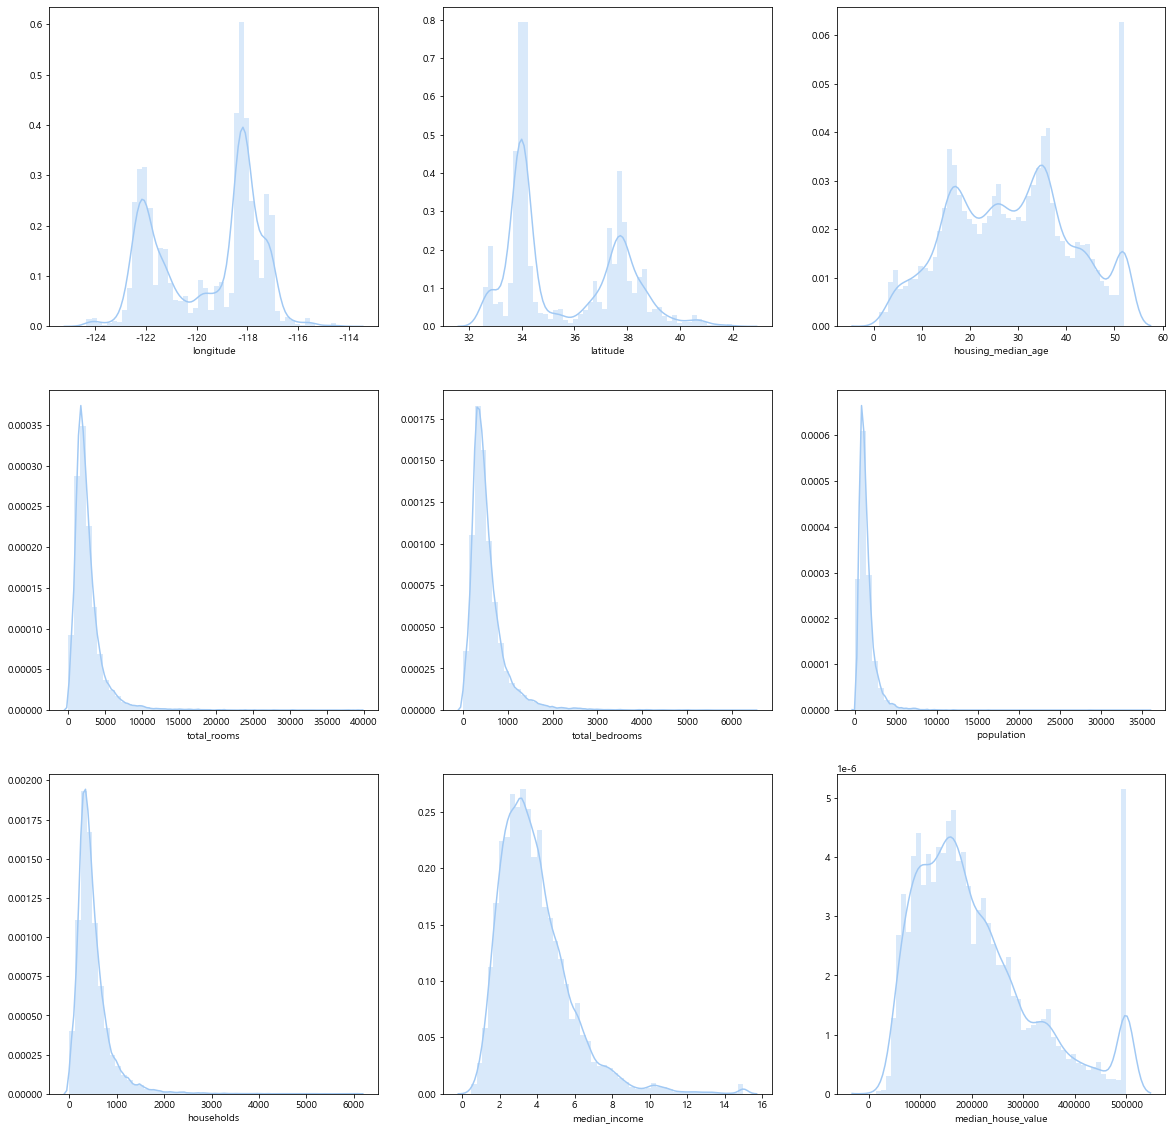

In [99]:
### 3 * 3
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
for i in range(3):
    for j in range(3):
        sns.distplot(housing.iloc[:, (i * 3) + j], kde=True, ax=axs[i, j], bins=50)
plt.show()

In [100]:
### delete some subplot graph
fig.delaxes(axs[2][2])

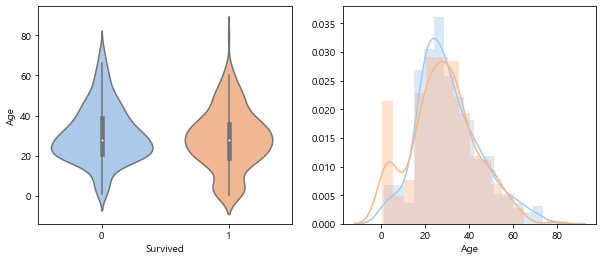

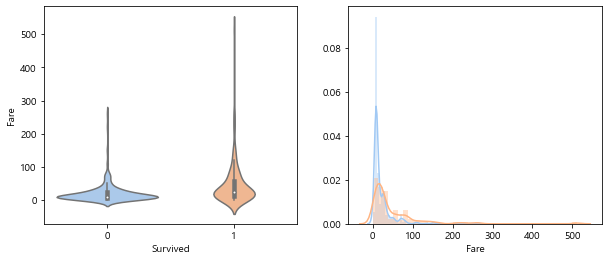

In [101]:
### Violin & Histogram
cont_columns = ['Age', 'Fare']

# 리스트로 할당된 컬럼들의 개수만큼 루프 수행.
for column in cont_columns:
    # 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화 하기 위해 nrows는 1, ncols=2인 서브플롯 생성. 
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    # 왼쪽 Axes객체에는 Survived값 0, 1별 개별 컬럼의 바이올린 플롯 시각화.
    sns.violinplot(x='Survived', y=column, data=titanic_df, ax=axs[0])
    # 오른쪽 Axes객체에는 Survived 값에 따른 개별 컬럼의 히스토그램 시각화 
    sns.distplot(titanic_df[column][titanic_df['Survived']==0], kde=True, ax=axs[1])
    sns.distplot(titanic_df[column][titanic_df['Survived']==1], kde=True, ax=axs[1])